In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr
import yfinance as yf
yf.pdr_override()
from datetime import datetime
data = pdr.get_data_yahoo('^GSPC', datetime(1970, 1, 1))

[*********************100%***********************]  1 of 1 completed


#### Import data

In [19]:
# Function to get mean returns and covariace matrix

def get_meanret_covmat(stocks, startdate, enddate):
    stock_data = pdr.get_data_yahoo(stocks, startdate, enddate)
    stock_data = stock_data['Close']
    returns = stock_data.pct_change()
    mean_returns = returns.mean()
    cov_matrix = returns.cov()
    
    return mean_returns, cov_matrix
    

In [22]:
stocks = ["BNTX", "PINS", "NVS", "TSLA", "FCNCA", "AAPL", "GOOG", "META", "GE"]
# stocks = [stock + '.AX' for stock in stocks]
end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days=300)

# Weights for portfolio
weights = np.random.random(len(mean_ret))
weigths /= np.sum(weights)
print(weights)

In [24]:
# testing function
mean_ret, cov_mat = get_meanret_covmat(stocks, start_date, end_date)
print(mean_ret, cov_mat)

[*********************100%***********************]  9 of 9 completed
AAPL     0.000769
BNTX    -0.000732
FCNCA    0.002403
GE       0.002430
GOOG    -0.000224
META     0.001139
NVS      0.000409
PINS     0.002268
TSLA    -0.000301
dtype: float64            AAPL      BNTX     FCNCA        GE      GOOG      META       NVS  \
AAPL   0.000433  0.000197  0.000184  0.000218  0.000391  0.000463  0.000078   
BNTX   0.000197  0.000955  0.000074  0.000167  0.000235  0.000362  0.000083   
FCNCA  0.000184  0.000074  0.001862  0.000228  0.000129  0.000281  0.000302   
GE     0.000218  0.000167  0.000228  0.000415  0.000212  0.000284  0.000079   
GOOG   0.000391  0.000235  0.000129  0.000212  0.000628  0.000648  0.000079   
META   0.000463  0.000362  0.000281  0.000284  0.000648  0.001479  0.000096   
NVS    0.000078  0.000083  0.000302  0.000079  0.000079  0.000096  0.000174   
PINS   0.000480  0.000372  0.000397  0.000306  0.000666  0.000886  0.000122   
TSLA   0.000474  0.000269  0.000342  0.0002

In [40]:
# Monte Carlo simulation

mc_sims = 100 # no of simulation
T = 100 # timeframe in days
meanM = np.full(shape = (T,len(weights)), fill_value = mean_ret)
meanM = meanM.T

portfolio_sims = np.full(shape =(T, mc_sims), fill_value = 0.0)
initial_portfolio = 10000

In [46]:
for m in range(mc_sims):
    z = np.random.normal(size = (T, len(weights)))
    L = np.linalg.cholesky(cov_mat)
    daily_returns = meanM + np.inner(L,z)
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, daily_returns.T) + 1)*initial_portfolio
    

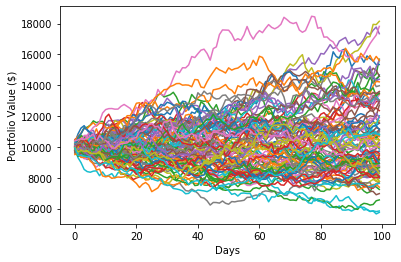

In [51]:
plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.show()